## Homework 04 - Doubly Linked List RISC-V Programming Assignment

### Assigned for Spring 2024 Semester: 2/8/2024
### Due for Spring 2024 Semester: 2/22/2024 at 11:59pm on Canvas

> <b>Note:</b> Review the <a href = "https://github.com/mmorri22/cse30321/blob/main/cse30321-syllabus.md">Course Syllabus</a> for policies regarding late submissions for Homework Assignments, as well as homework collaboration. You are welcome to study together, but the final submission must be your own good-faith attempt.

### Group Assignment

This programming assignment may be performed in groups of <b>no less than 3</b> and <b>no more than 4</b> students.

You will submit a text file containing your Code and a PDF containing your corresponding responses to submissions.

You will be programming using the same RISC-V interpreter that we coded the Singly Linked List in class.
<ul>
    <li>The Cornell <b>RISC-V interpreter</b> may be <a href = "https://www.cs.cornell.edu/courses/cs3410/2019sp/riscv/interpreter">found at this link</a></li>
    <li>The solution to the <b>Singly Linked List</b> we programmed in class may be <a href = "https://raw.githubusercontent.com/mmorri22/cse30321/main/inclass/lec05/risc_code/L05_03_singly_linked_list.S.txt">found at this link</a></li>
    <li>The <b>Powerpoint Slides</b> where I covered how we designed the Singly Linked List in RISC-V may be found on the <a href = "https://canvas.nd.edu/courses/82217/pages/lecture-notes-and-schedule#week3">Canvas Lecture Notes and Schedule</a> page under Lectures 05 and 06 in Weeks 2 and 3.</li>
</ul>

### Background: Reviewing the Singly Linked List solution

Recall in class when we programmed the Singly Linked List together. You were given the following C code segments:

1) A C Struct for a Singly Linked List node:

    typedef struct sll_node{
        int the_int;
        struct sll_node* next_node;
    }sllist;
    
2) A C struct for the head node to provide encapsulation for the Singly Linked List:

    typedef struct sllist{
        struct sll_node* head_ptr;
    }sllist;
    
3) Next, a loop where the integers 1 to 5 were added to a Singly Linked List was provided

    // Initialize the Linked List
    sllist* the_list = ( sllist* )calloc( 1, sizeof(sllist) );
    
    
    for( int x = 1; x <= 5; ++x ){
    
        sll_node* made_node = ( sll_node* )calloc( 1, sizeof(sll_node) ); // Create a new node with calloc
        made_node->the_int = x;                                           // Set that node's value to x
        if(the_list->head_node == NULL){                                  // If the head node points to NULL
            the_list->head_node = made_node;                              // Set that head node to the new node
        }
        else{
            sll_node* curr_ptr = the_list->head_node;                     // Create a pointer that points to the node
            while( curr_ptr->next_node != NULL ){                         // Iterate while the next node is not NULL
                 curr_ptr = curr_ptr->next_node;                          // Update that curr_ptr if there is a next node
            }
            curr_ptr->next_node = made_node;                              // Set the curr_ptr's node to next node
        }
    }
    
4) Finally, you were given the following problem statement:

Given the C structs for Singly Linked Lists, and the following C code, write a RISC-V assembly language program and creates the Singly Linked List for insertions. Given the following information, write a RISC-V assembly program for the following C code segment:
<ul>
    <li>The <code>sll_list</code> is created at address <code>0x051a6110</code>, and the pointer is in <code>x18</code></li>
    <li>Since the optimal size of the <code>sll_node</code> is 64 bits (one <code>int</code> and one <code>sll_node*</code> for an address), each new node is created every 96 bits to preserve memory alignment as the C compiler does.</li>
    <li>This also includes 96 bits from the initial <code>sll_list</code> struct.</li>
    <li><code>int x</code> is stored in <code>x19</code>.</li>
    <li>Assume 32 bits for integers and addresses for the 32-bit architecture.</li>
</ul>

#### Result

This is a screen capture (with a modification for clarity) on how the <b>Data Memory</b> appeared when the solution was run.

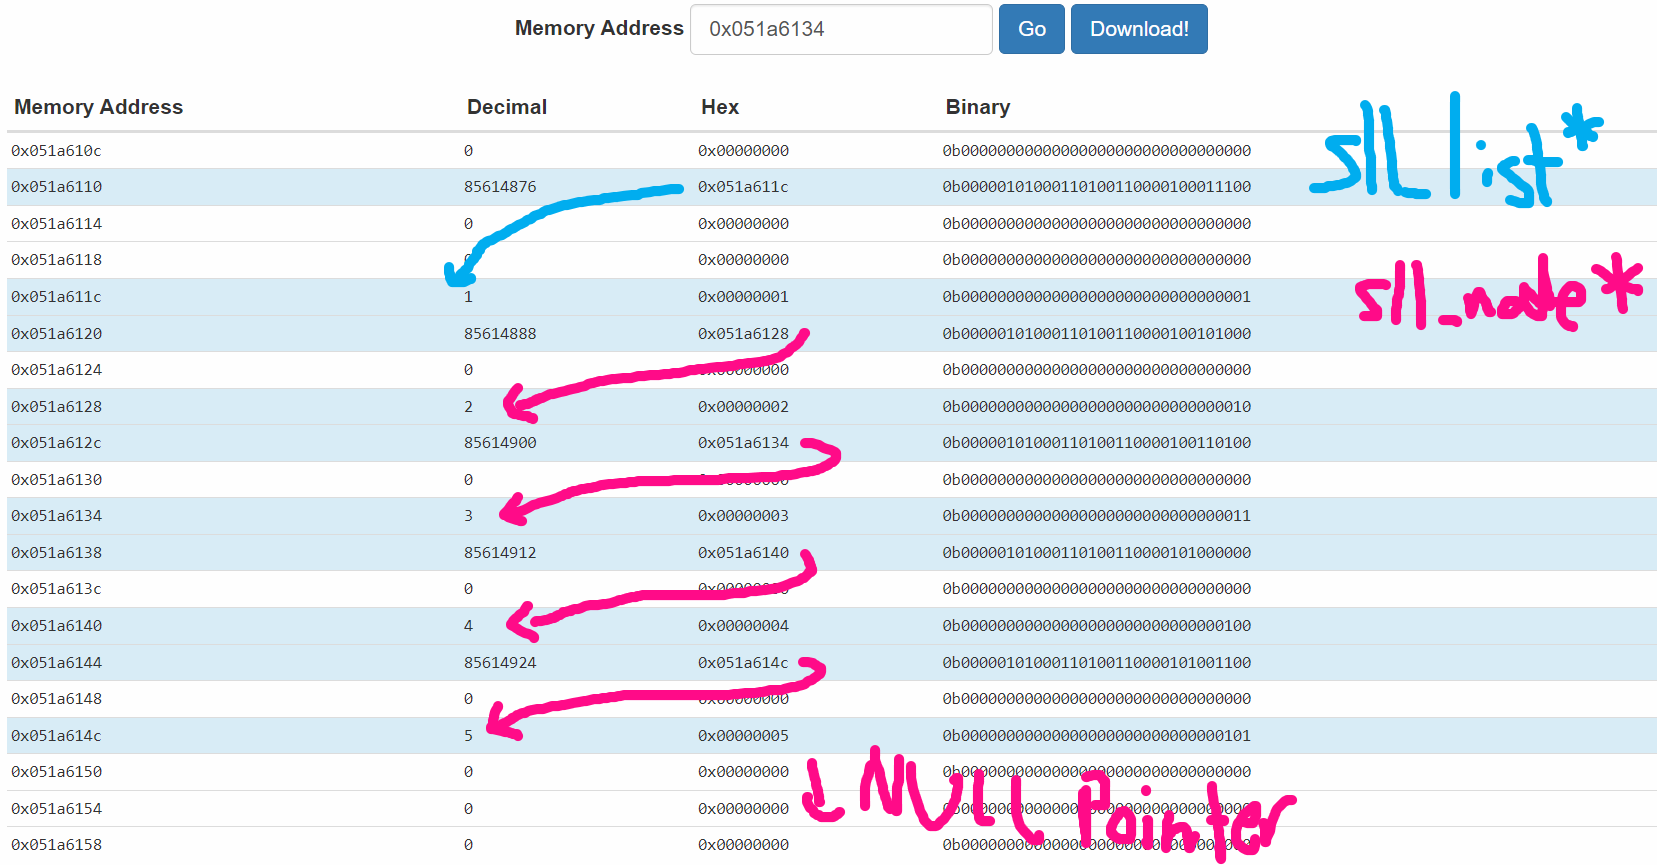

And this is the appearance of the Registers. Since <code>x18</code> pointed to the <code>sll_list</code> struct, it finished at <code>0x051a6110</code>. And since <code>x6</code> was the temporary register used to keep track of the loop, it is pointing at the final node in the Singly Linked List at <code>0x051a614c</code>.

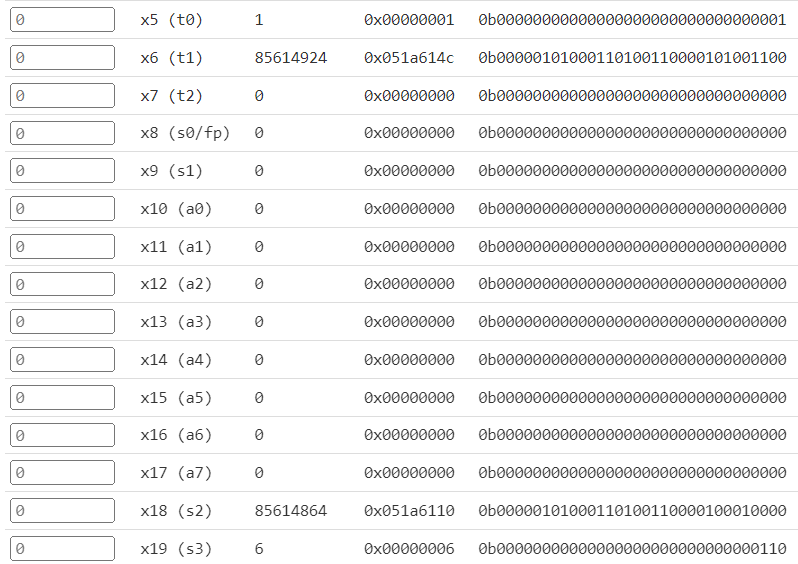

## The Assignment - Doubly Linked List

You will update and modify this node to insert a node into a Doubly Linked List like you learned in Data Structures or Introduction to Computing. You are given the following C code segments for this assignment:

1) A C Struct for a Doubly Linked List node:

    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }sllist;
    
2) A C struct for the head node to provide encapsulation for the Doubly Linked List:

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }sllist;
    
3) Next, a loop where the integers 1 to 5 were added to a Doubly Linked List is provided

    // Initialize the Linked List
    dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );
    
    for( int y = 3; y >= 0; --y ){
    
        dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) ); // Create a new node with calloc
        made_node->the_int = y;                                           // Set that node's value to x
        if(the_list->head_node == NULL){                                  // If the head node points to NULL
            the_list->head_node = made_node;                              // Set the head ptr to the new node
            the_list->tail_node = made_node;                              // Set the tail ptr to the new node
        }
        else{
            dll_node* curr_ptr = the_list->head_node;                     // Create a pointer that points to the node
            while( curr_ptr->next_node != NULL ){                         // Iterate while the next node is not NULL
                 curr_ptr = curr_ptr->next_node;                          // Update that curr_ptr if there is a next node
            }
            curr_ptr->next_node = made_node;                              // Set the curr_ptr's node to next node
            made_node->prev_node = curr_ptr;                              // Set the made_node's previous ptr to curr_ptr
            the_list->tail_node = made_node;                              // Set the list's tail_node = made_node
        }
    }
    
4) Finally, you are given the following problem statement:

Given the C structs for Doubly Linked Lists, and the following C code, write a RISC-V assembly language program and creates the Doubly Linked List for insertions. Given the following information, write a RISC-V assembly program for the following C code segment:
<ul>
    <li>Go to the <a href = "https://www.google.com/search?q=generate+a+random+number&rlz=1C1GCEA_en&oq=Generate+a+Random+Nu&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyBwgBEAAYgAQyBggCEEUYOTIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABKgCALACAA&sourceid=chrome&ie=UTF-8">Google Random Number Generator</a> and generate a random number between <code>0</code> and <code>2147483647</code>.</li>
    <li>Go to the <a href = "https://www.rapidtables.com/convert/number/decimal-to-hex.html">Rapid Tables Decimal-to-Hex Converter</a> and convert your randomly generated integer to hexadecimal.</li>
    <li>Change the last two hexadecimal values to <code>00</code> for readability (i.e. If you randomly generate the integer <code>55436851</code>, this will translate to <code>34DE633</code>, which you will change to <code>34DE600</code>. This change will make troubleshooting your Doubly Linked List much easier.</li>
    <li>If your generated hex value is less than eight hex values, add leading 0's to make it 8 hex values. For example, the sample <code>34DE600</code> will now become <code>034DE600</code></li>
    <li>Document the generated result and your changes, which you will include in your final report.</li>
    <li>The <code>dll_list</code> is created at address <code>0xXXXXXXXX</code>, where your <i>uniquely</i> generated hex value is your unique starting address. This means each project will start at a different address. The pointer is in <code>x18</code></li>
    <li>Since the optimal size of the <code>dll_node</code> is 96 bits (one <code>int</code> and two <code>dll_node*</code> pointers with addresses), each new node is created every 128 bits to preserve memory alignment as the C compiler does.</li>
    <li>This also includes 128 bits from the initial <code>sll_list</code> struct.</li>
    <li><code>int x</code> is stored in <code>x19</code>.</li>
    <li>Assume 32 bits for integers and addresses for the 32-bit architecture.</li>
</ul>


### Example Solution Output

In the Singly-Linked List, the <code>sll_node</code> pointer points to the next node only. In the Doubly-Linked List, the node pointers, one of the dll_node* pointers similarly points to the next node, but the other points to the <i>previous</i> node. 